# Getaround - Pricing analysis EDA

In [59]:
# Import useful libraries
import pandas as pd 
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.kaleido.scope.plotlyjs = r'C:\Users\Public\plotly\package_data\plotly.min.js'
pio.renderers.default = "png" # Comment / delete this line for interactive graphs
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

## 1. Load dataset and display basic informations

In [48]:
# Read dataset
data = pd.read_csv("../00_Data/get_around_pricing_project.csv", index_col = 0)
data.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4843 non-null   int64 
dtypes: bool(

In [50]:
data.describe(include = "all")

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [51]:
data.isna().sum()

model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [52]:
# Check for data inconsistencies 

print(f"There is {len(data[data['mileage'] <= 0])} inconsistencies in the lineage column: ")
display(data[data['mileage'] <= 0])

print(f"There is {len(data[data['engine_power'] <= 0])} inconsistencies in the engine power column: ")
display(data[data['engine_power'] <= 0])

There is 1 inconsistencies in the lineage column: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
2938,Renault,-64,230,diesel,black,sedan,True,True,False,True,False,False,True,274


There is 1 inconsistencies in the engine power column: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
3765,Nissan,81770,0,diesel,white,suv,False,False,False,False,False,False,False,108


Since a car's mileage cannot be less than 0 and engine power equal to 0, we will remove these two lines for the following analyses.

In [53]:
# Remove inconsistencies
print(f"Number of cars registered: {len(data)}")
data = data[(data["mileage"] > 0) & (data["engine_power"] > 0)]
print(f"Number of cars after removing inconsistencies : {len(data)}")

Number of cars registered: 4843
Number of cars after removing inconsistencies : 4841


## 2. Visualize data

Since the objective of this data is to make it possible to evaluate the rental price of a vehicle, we will here focus on the influence of each variable on this price.

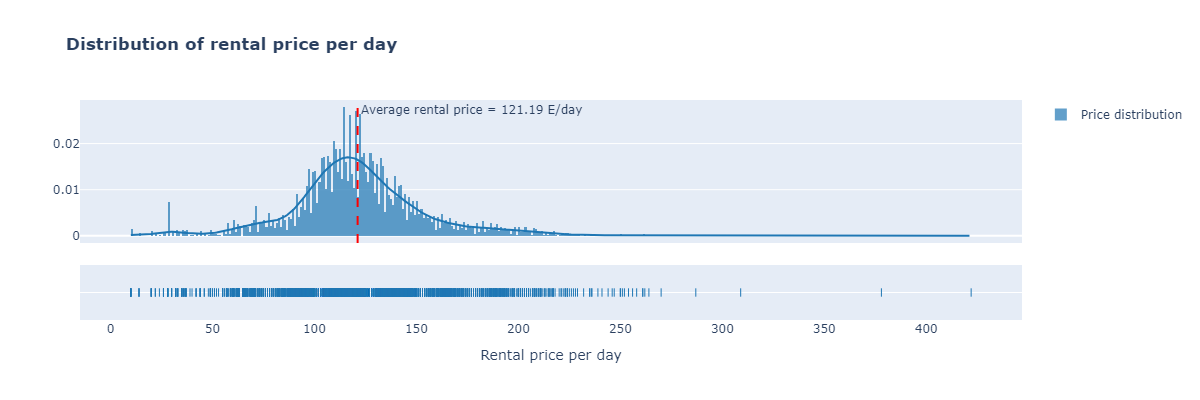

In [67]:
price_dist = ff.create_distplot([data["rental_price_per_day"]], group_labels = ["Price distribution"])
price_dist.add_vline(x = data['rental_price_per_day'].mean(), line_color = "red", line_dash = "dash", annotation_text = f"Average rental price = {round(data['rental_price_per_day'].mean(), 2)} E/day")
price_dist.update_xaxes(title_text = "Rental price per day")
price_dist.update_layout(title_text = "<b> Distribution of rental price per day <b>", width = 1200, height = 400)
price_dist.show()

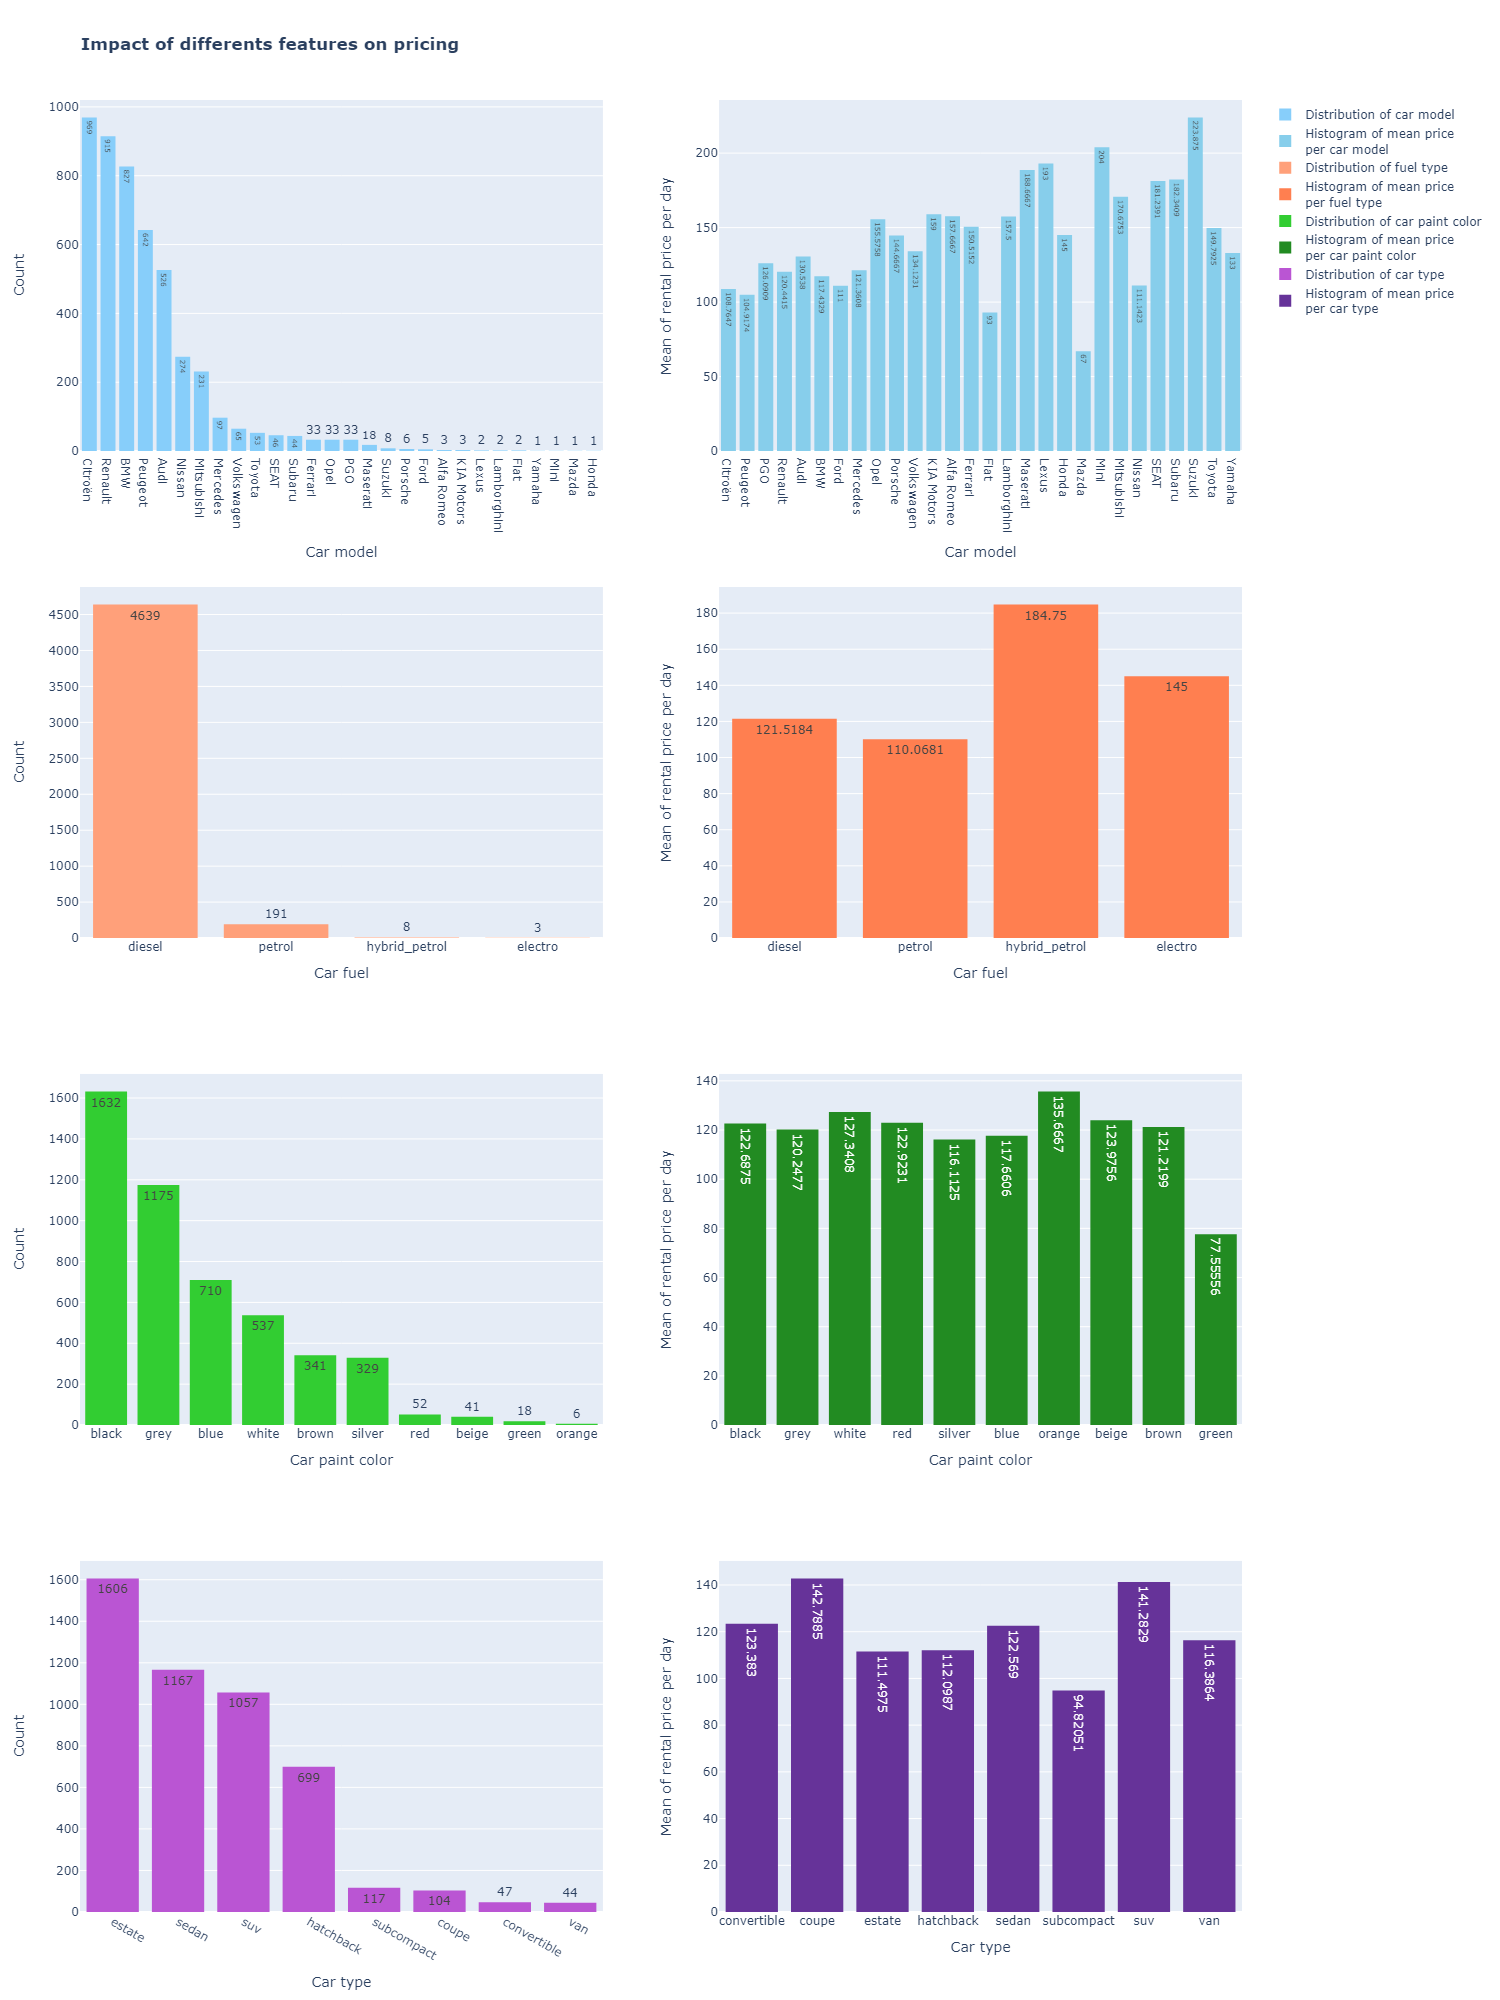

In [68]:
cat_figure = make_subplots(rows = 4, cols = 2)

### Car model 

cat_figure.add_trace(go.Histogram(x = data["model_key"], marker_color = "lightskyblue", texttemplate = "%{y}", name = "Distribution of car model"), row = 1, col = 1)
cat_figure.update_xaxes(title_text = "Car model", categoryorder = "total descending", row = 1, col = 1)
cat_figure.update_yaxes(title_text = "Count", row = 1, col = 1)

cat_figure.add_trace(go.Histogram(x = data["model_key"], y = data["rental_price_per_day"], histfunc = "avg", marker_color = "skyblue", texttemplate = "%{y}", name = "Histogram of mean price<br>per car model"), row = 1, col = 2)
cat_figure.update_xaxes(title_text = "Car model", row = 1, col = 2)
cat_figure.update_yaxes(title_text = "Mean of rental price per day", row = 1, col = 2)

### Fuel 

cat_figure.add_trace(go.Histogram(x = data["fuel"], marker_color = "lightsalmon", texttemplate = "%{y}", name = "Distribution of fuel type"), row = 2, col = 1)
cat_figure.update_xaxes(title_text = "Car fuel", categoryorder = "total descending", row = 2, col = 1)
cat_figure.update_yaxes(title_text = "Count", row = 2, col = 1)

cat_figure.add_trace(go.Histogram(x = data["fuel"], y = data["rental_price_per_day"], histfunc = "avg", marker_color = "coral", texttemplate = "%{y}", name = "Histogram of mean price<br>per fuel type"), row = 2, col = 2)
cat_figure.update_xaxes(title_text = "Car fuel", row = 2, col = 2)
cat_figure.update_yaxes(title_text = "Mean of rental price per day", row = 2, col = 2)

### Car paint color

cat_figure.add_trace(go.Histogram(x = data["paint_color"], marker_color = "limegreen", texttemplate = "%{y}", name = "Distribution of car paint color"), row = 3, col = 1)
cat_figure.update_xaxes(title_text = "Car paint color", categoryorder = "total descending", row = 3, col = 1)
cat_figure.update_yaxes(title_text = "Count", row = 3, col = 1)

cat_figure.add_trace(go.Histogram(x = data["paint_color"], y = data["rental_price_per_day"], histfunc = "avg", marker_color = "forestgreen", texttemplate = "%{y}", name = "Histogram of mean price<br>per car paint color"), row = 3, col = 2)
cat_figure.update_xaxes(title_text = "Car paint color", row = 3, col = 2)
cat_figure.update_yaxes(title_text = "Mean of rental price per day", row = 3, col = 2)

### Car type

cat_figure.add_trace(go.Histogram(x = data["car_type"], marker_color = "mediumorchid", texttemplate = "%{y}", name = "Distribution of car type"), row = 4, col = 1)
cat_figure.update_xaxes(title_text = "Car type", categoryorder = "total descending", row = 4, col = 1)
cat_figure.update_yaxes(title_text = "Count", row = 4, col = 1)

cat_figure.add_trace(go.Histogram(x = data["car_type"], y = data["rental_price_per_day"], histfunc = "avg", marker_color = "rebeccapurple", texttemplate = "%{y}", name = "Histogram of mean price<br>per car type"), row = 4, col = 2)
cat_figure.update_xaxes(title_text = "Car type", row = 4, col = 2)
cat_figure.update_yaxes(title_text = "Mean of rental price per day", row = 4, col = 2)


cat_figure.update_layout(width = 1500, height = 2000, title_text = " <b> Impact of differents features on pricing <b> ")
               
cat_figure.show()

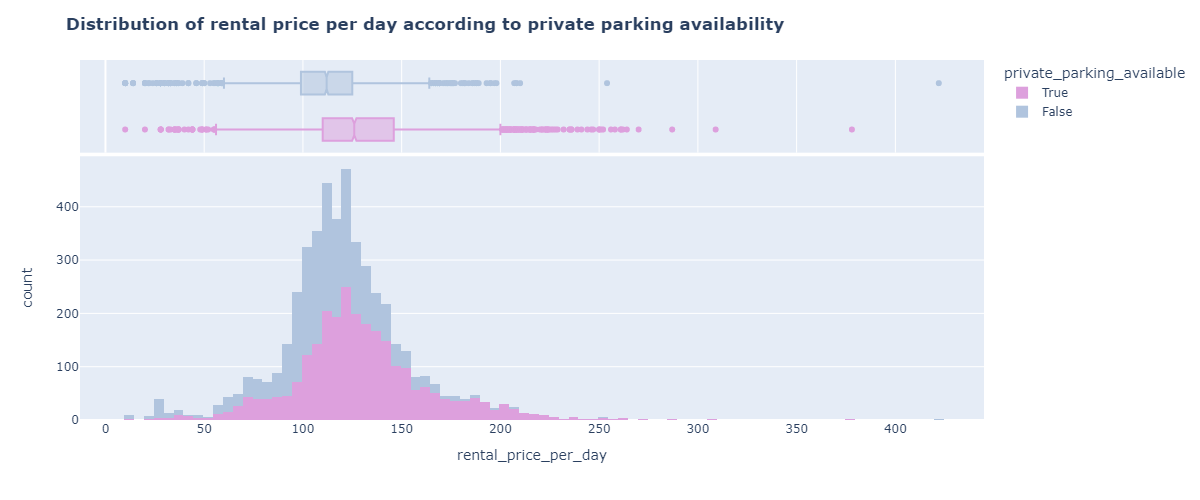

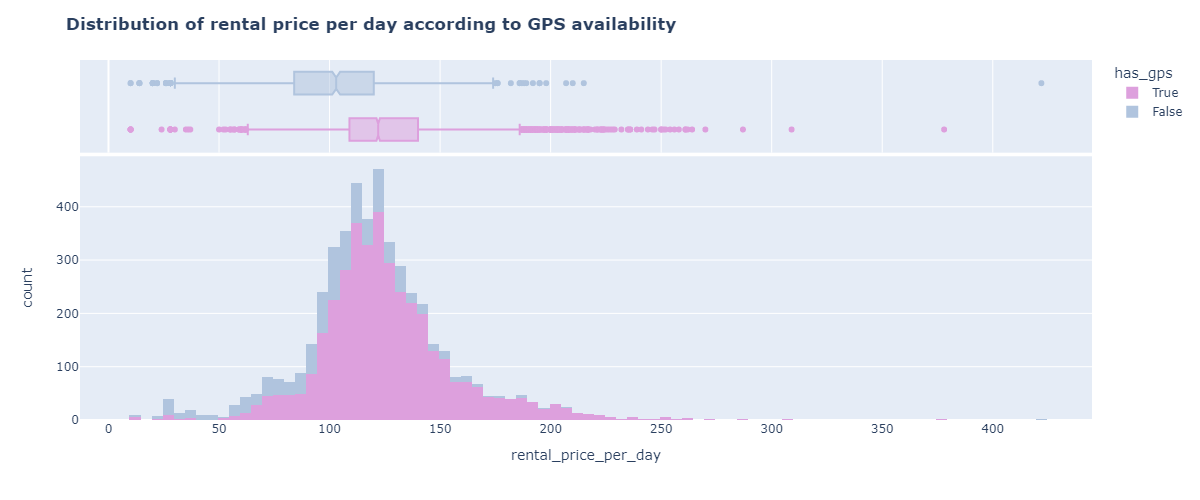

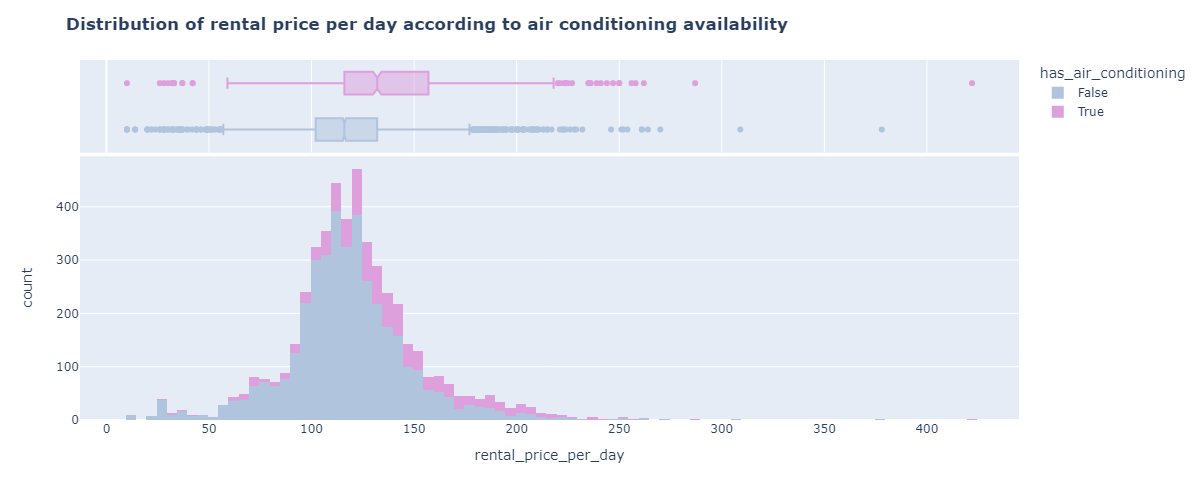

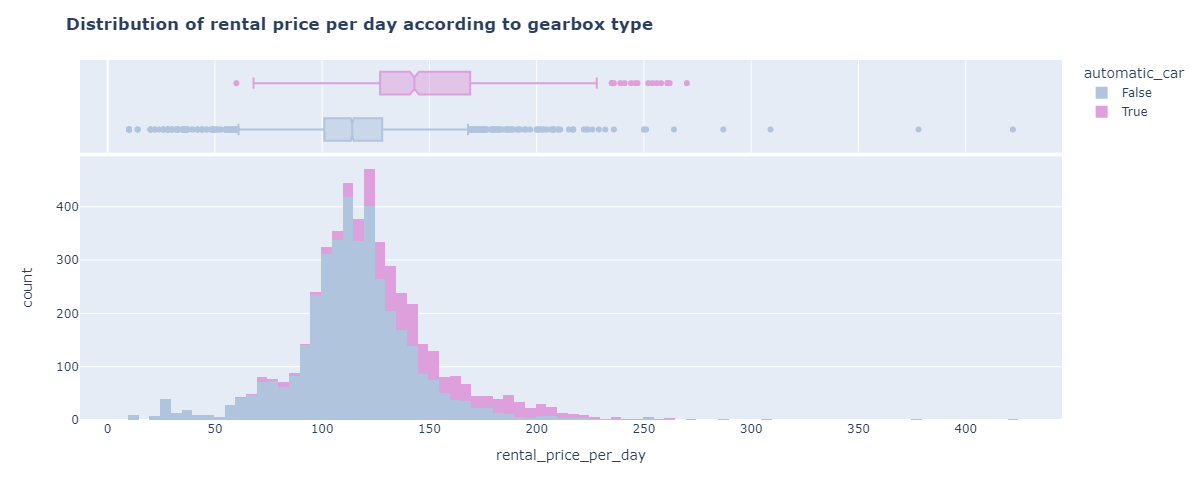

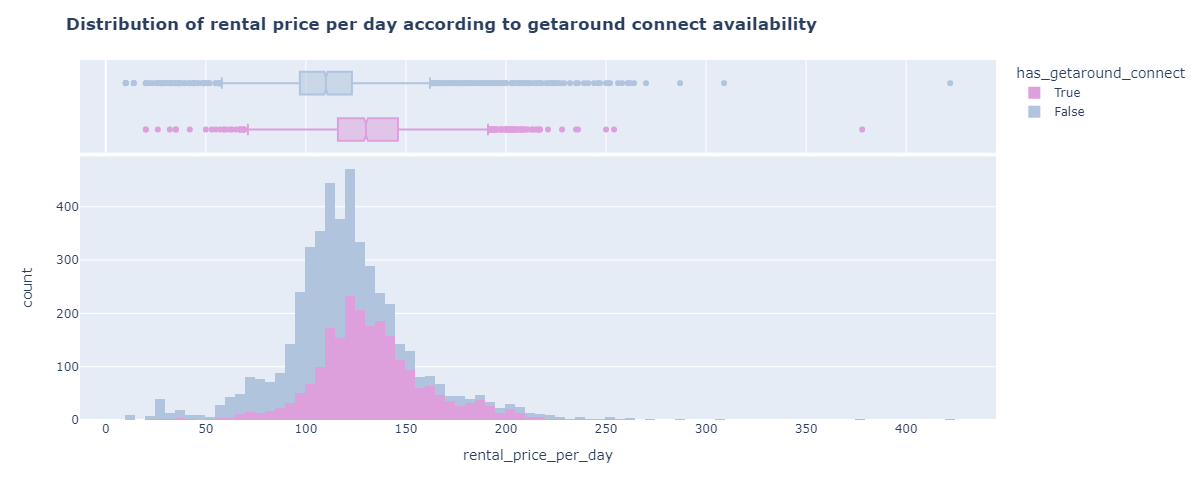

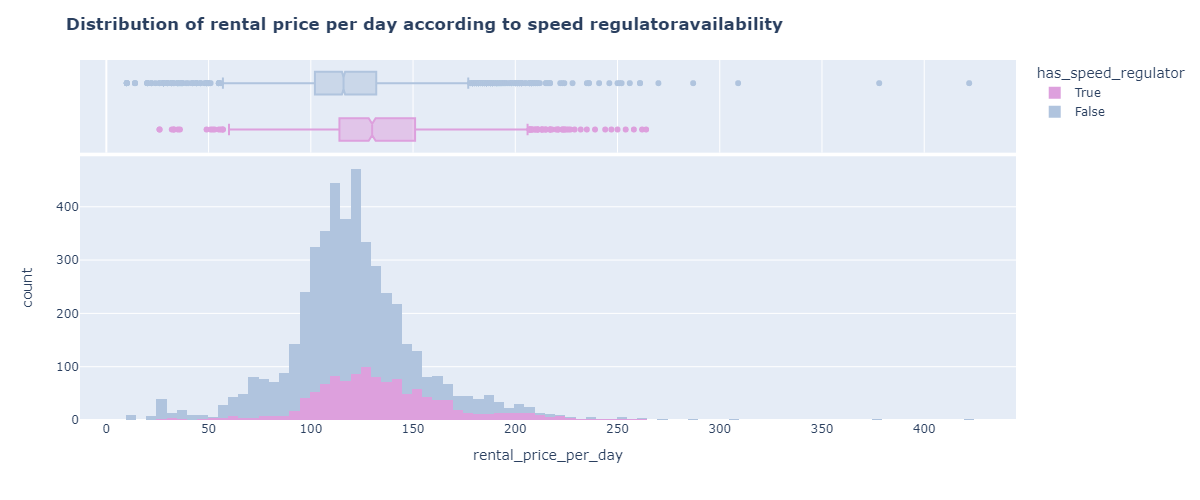

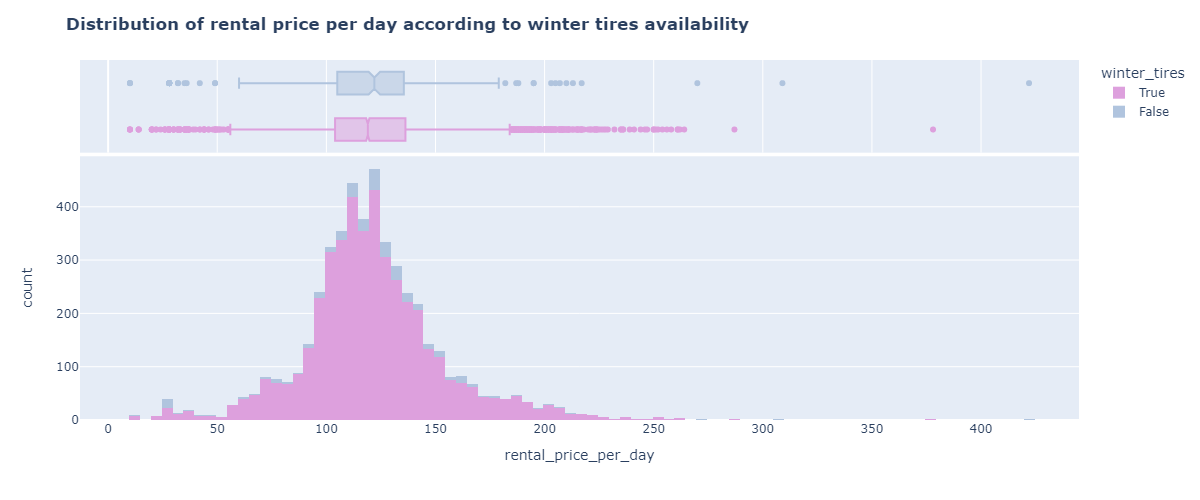

In [87]:
### Private parking available

parking_fig = px.histogram(data, x = "rental_price_per_day", color = "private_parking_available", color_discrete_map = {True: "plum", False: "lightsteelblue"}, marginal = "box")
parking_fig.update_layout(width = 1200, title_text = "<b> Distribution of rental price per day according to private parking availability <b>")
parking_fig.show()

### Has GPS 

gps_fig = px.histogram(data, x = "rental_price_per_day", color = "has_gps", color_discrete_map = {True: "plum", False: "lightsteelblue"}, marginal = "box")
gps_fig.update_layout(width = 1200, title_text = "<b> Distribution of rental price per day according to GPS availability <b>")
gps_fig.show()

### Has air conditioning

air_fig = px.histogram(data, x = "rental_price_per_day", color = "has_air_conditioning", color_discrete_map = {True: "plum", False: "lightsteelblue"}, marginal = "box")
air_fig.update_layout(width = 1200, title_text = "<b> Distribution of rental price per day according to air conditioning availability <b>")
air_fig.show()

### Automatic car

gearbox_fig = px.histogram(data, x = "rental_price_per_day", color = "automatic_car", color_discrete_map = {True: "plum", False: "lightsteelblue"}, marginal = "box")
gearbox_fig.update_layout(width = 1200, title_text = "<b> Distribution of rental price per day according to gearbox type <b>")
gearbox_fig.show()

### Has getaround connect

connect_fig = px.histogram(data, x = "rental_price_per_day", color = "has_getaround_connect", color_discrete_map = {True: "plum", False: "lightsteelblue"}, marginal = "box")
connect_fig.update_layout(width = 1200, title_text = "<b> Distribution of rental price per day according to getaround connect availability <b>")
connect_fig.show()

### Has speed regulator

regulator_fig = px.histogram(data, x = "rental_price_per_day", color = "has_speed_regulator", color_discrete_map = {True: "plum", False: "lightsteelblue"}, marginal = "box")
regulator_fig.update_layout(width = 1200, title_text = "<b> Distribution of rental price per day according to speed regulatoravailability <b>")
regulator_fig.show()

### Winter tires

tires_fig = px.histogram(data, x = "rental_price_per_day", color = "winter_tires", color_discrete_map = {True: "plum", False: "lightsteelblue"}, marginal = "box")
tires_fig.update_layout(width = 1200, title_text = "<b> Distribution of rental price per day according to winter tires availability <b>")
tires_fig.show()

For certain variables, we observe categories with very few elements, in particular for the variables "car model" and "car paint color".  
For these, in order to limit potential overfitting, it is important to group them into a single category.  
Moreover, certain variables seem to have more influence on the price than other, we will wheck that with a correlation matrix.  
We will also verify that is not correlated variable in order to use them later, during the model training.

In [88]:
for feature in ["model_key", "fuel", "paint_color", "car_type"]:
    label_counts = data[feature].value_counts()
    fewly_populated_labels = list(label_counts[label_counts < 0.5 / 100 * len(data)].index)
    for label in fewly_populated_labels:
        data.loc[data[feature] == label,feature] = 'other'
        print(f"Replaced '{label}' label in '{feature}' feature by 'other'")

Replaced 'Maserati' label in 'model_key' feature by 'other'
Replaced 'Suzuki' label in 'model_key' feature by 'other'
Replaced 'Porsche' label in 'model_key' feature by 'other'
Replaced 'Ford' label in 'model_key' feature by 'other'
Replaced 'KIA Motors' label in 'model_key' feature by 'other'
Replaced 'Alfa Romeo' label in 'model_key' feature by 'other'
Replaced 'Fiat' label in 'model_key' feature by 'other'
Replaced 'Lexus' label in 'model_key' feature by 'other'
Replaced 'Lamborghini' label in 'model_key' feature by 'other'
Replaced 'Mini' label in 'model_key' feature by 'other'
Replaced 'Mazda' label in 'model_key' feature by 'other'
Replaced 'Honda' label in 'model_key' feature by 'other'
Replaced 'Yamaha' label in 'model_key' feature by 'other'
Replaced 'hybrid_petrol' label in 'fuel' feature by 'other'
Replaced 'electro' label in 'fuel' feature by 'other'
Replaced 'green' label in 'paint_color' feature by 'other'
Replaced 'orange' label in 'paint_color' feature by 'other'


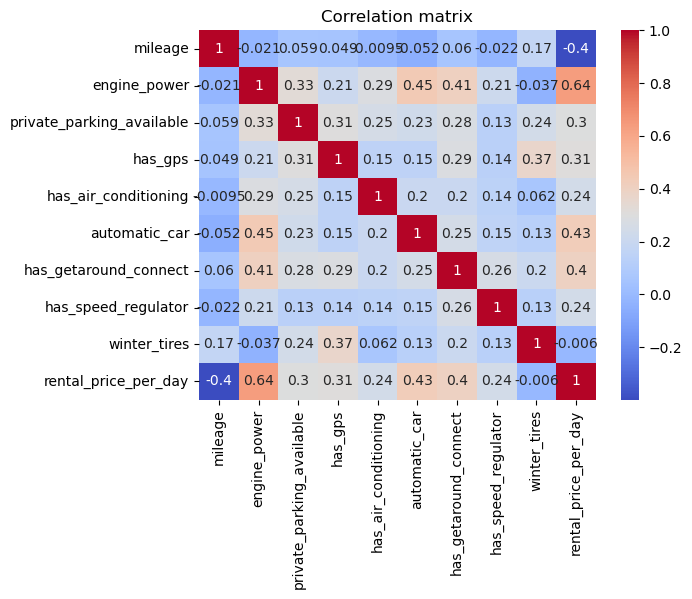

In [89]:
corr_ = data.corr(method = 'spearman')

sns.heatmap(corr_ , annot = True , cmap = 'coolwarm')
plt.title('Correlation matrix')
plt.show()

According to the correlation matrix above, the explanatory variables do not seem to be correlated with each other and can therefore all be used when training the model.  
At the same time, as expected, certain variables are more linked to the rental price than others, particularly engine power and mileage.